In [247]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
# Accedo directamente al CSV ya que la api no devuelve los datasets de las visualizaciones
df_P_100_prov = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/281491/data.csv")#Acceso por cada 100 personas
df_I_vel_prov = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/275026/data.csv")#Acceso a internet por rango de velocidad y por provincia
df_I_tec_prov = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/255796/data.csv")#Acceso a internet por tecnologia y provincia
df_I_vel_down = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/290237/data.csv")#Velocidad Media de bajada por provincia

## Exploramos la infomación de nuestros datos

In [249]:
df_P_100_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [250]:
df_P_100_prov.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [251]:
df_I_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [252]:
df_I_vel_prov.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [253]:
df_I_tec_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [254]:
df_I_tec_prov.isnull().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

In [255]:
df_I_tec_prov.dropna(inplace = True)
df_I_tec_prov.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [256]:
df_I_vel_down.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [257]:
df_I_vel_down.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Mbps (Media de bajada)      0
Unnamed: 4                840
Unnamed: 5                840
dtype: int64

### Vsualizamos los datos

In [258]:
df_P_100_prov.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [259]:
df_I_vel_prov.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [260]:
df_I_tec_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [261]:
df_I_vel_down.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [262]:
# Elimino la ultima columna de la tabla que tiene datos NAN
df_I_vel_down = df_I_vel_down.drop(df_I_vel_down.columns[[4,5]], axis='columns')
df_I_vel_down

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16
...,...,...,...,...
835,2014,1,Santa Cruz,3
836,2014,1,Santa Fe,3
837,2014,1,Santiago Del Estero,3
838,2014,1,Tierra Del Fuego,3


## Analizo graficamente para tener una idea de la distribución de los datos

<Axes: ylabel='count'>

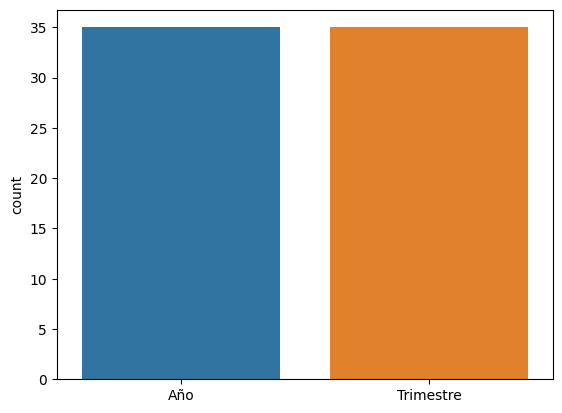

In [263]:
sns.countplot(df_P_100_prov)

<function matplotlib.pyplot.show(close=None, block=None)>

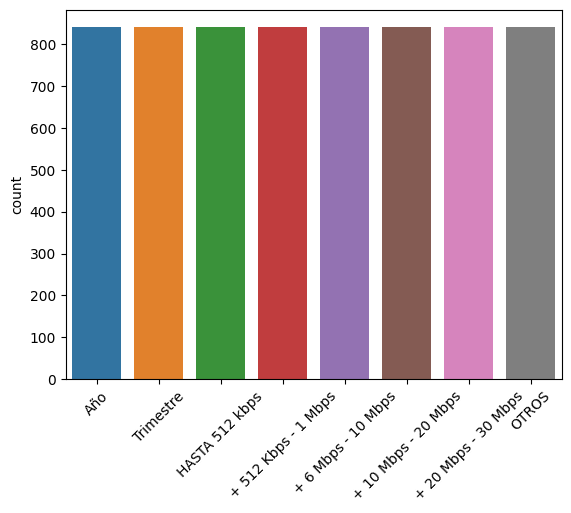

In [264]:
sns.countplot(df_I_vel_prov)
plt.xticks(rotation=45)
plt.show

<Axes: ylabel='count'>

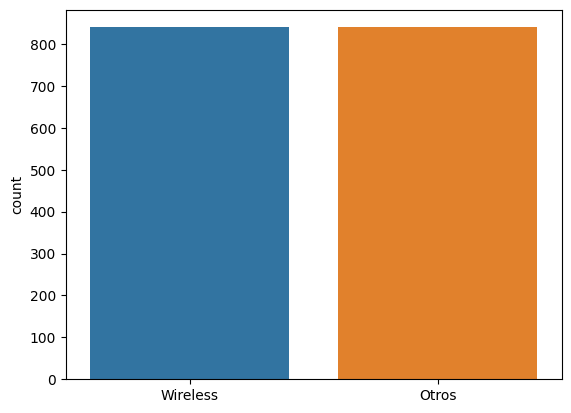

In [265]:
sns.countplot(df_I_tec_prov)

<Axes: ylabel='count'>

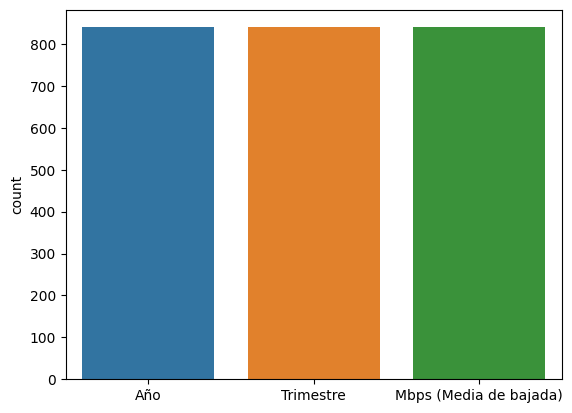

In [266]:
sns.countplot(df_I_vel_down)

## Obtener mas info estadística de los datos que tenemos

In [267]:
df_P_100_prov.describe()

,Año,Trimestre
count,35.000000,35.000000
mean,2017.885714,2.457143
std,2.564135,1.120474
min,2014.000000,1.000000
25%,2016.000000,1.500000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [268]:
df_I_vel_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,834.000000
mean,2017.885714,2.457143,126.009998,101.790393,71.417265,79.988627,100.758158,32.937064
std,2.528745,1.105009,187.578607,207.396126,140.324223,170.586599,208.683467,128.937905
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.000000,10.000000,3.362500,5.357250,4.872000,2.019000,0.000000
50%,2018.000000,2.000000,50.000000,8.788000,20.157000,14.965500,11.251500,0.000000
75%,2020.000000,3.000000,134.000000,84.340500,62.225500,55.093000,64.286250,7.497750
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,923.000000


In [269]:
df_I_tec_prov.describe()

,Wireless,Otros
count,840.000000,840.000000
mean,58.571726,102.303848
std,158.016953,207.118151
min,0.000000,1.007000
25%,3.437500,2.934000
50%,8.186500,15.267000
75%,26.024500,47.000000
max,952.000000,987.000000


In [270]:
df_I_vel_down.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.841667
std,2.528745,1.105009,14.669499
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,4.000000
50%,2018.000000,2.000000,7.000000
75%,2020.000000,3.000000,18.000000
max,2022.000000,4.000000,101.000000


## Histogramas:
######  Estos nos van a permitir ver los datos cuantitativos. El objetivo es saber cómo se distribuyen las entradas, si están centradas o sesgadas, los rangos de los datos, la distribución es unimodal o multimodal, etc. 

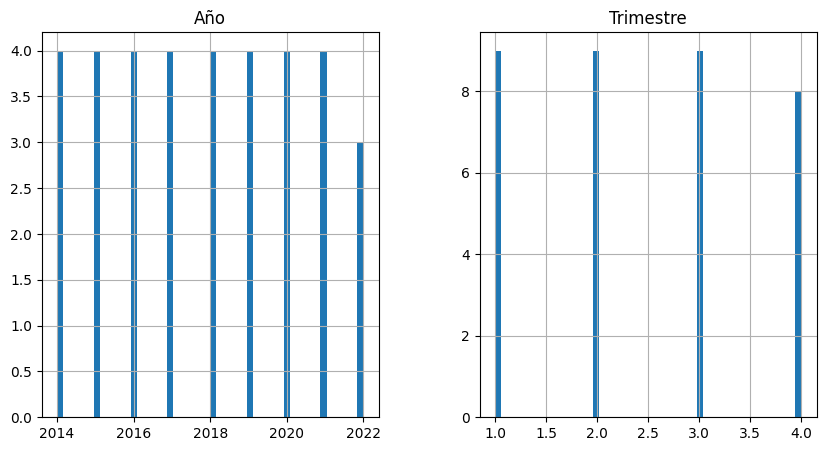

In [271]:
df_P_100_prov.hist(bins = 50, figsize = (10, 5))
plt.show()

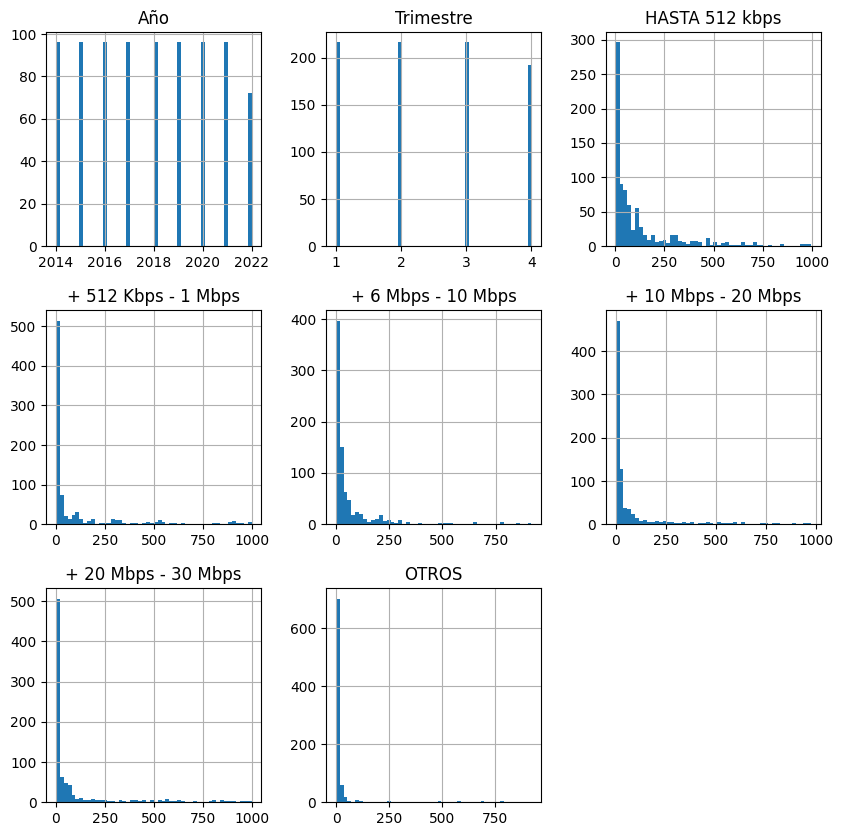

In [272]:
df_I_vel_prov.hist(bins = 50, figsize = (10, 10))
plt.xticks(rotation=45)
plt.show()

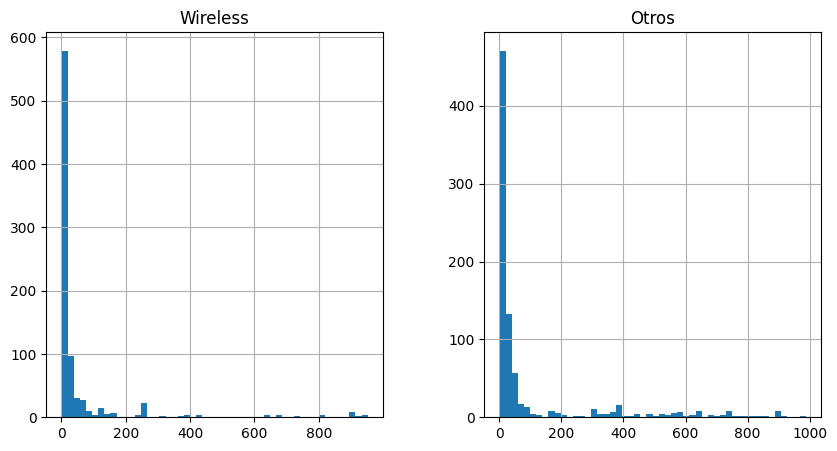

In [273]:
df_I_tec_prov.hist(bins = 50, figsize = (10, 5))
plt.show()

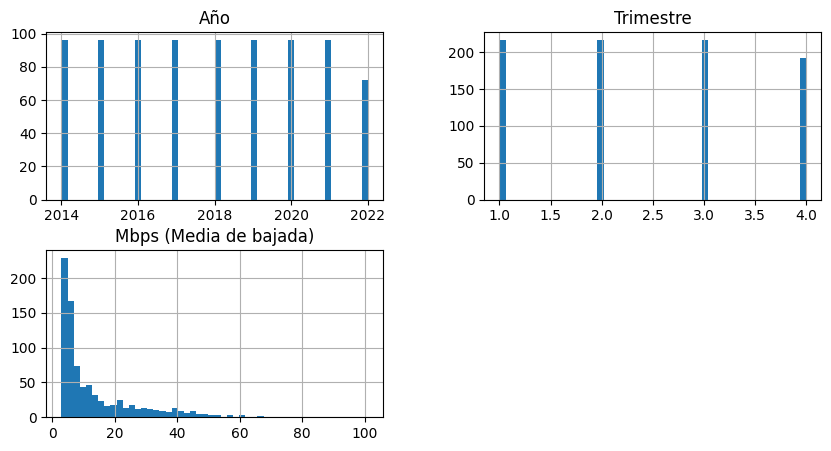

In [274]:
df_I_vel_down.hist(bins = 50, figsize = (10, 5))
plt.show()

## Heat-Maps:
###### Con el mapa de calor voy a poder ver si existe una correlación entre cualquier par de variables.La correlacion va a ser positiva cuando mas se acerca al 1.

<ipython-input-275-66c77af61bb9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_P_100_prov.corr()


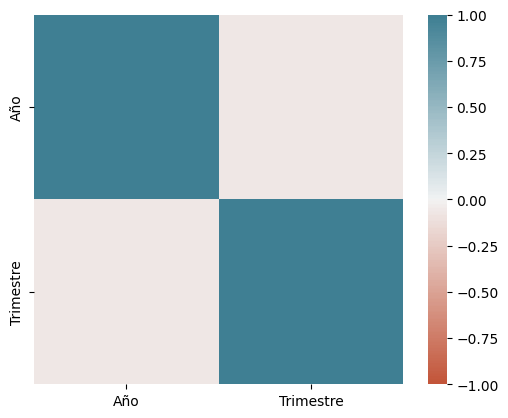

In [275]:
corr_matrix = df_P_100_prov.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

<ipython-input-276-7febca78ceac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_I_vel_prov.corr()


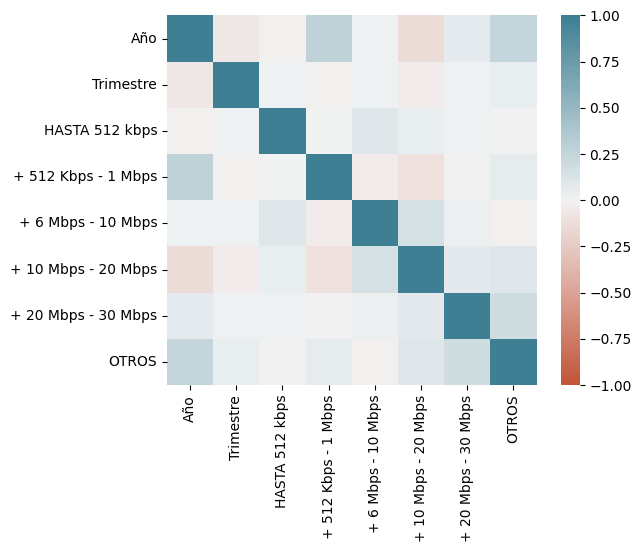

In [276]:
corr_matrix = df_I_vel_prov.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

<ipython-input-277-8b8ae72f07a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_I_tec_prov.corr()


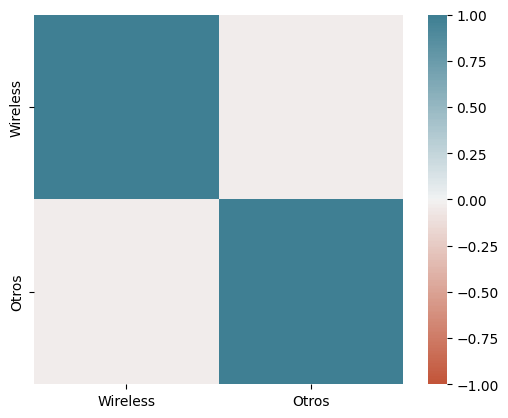

In [277]:
corr_matrix = df_I_tec_prov.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

<ipython-input-278-758f55635e67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_I_vel_down.corr()


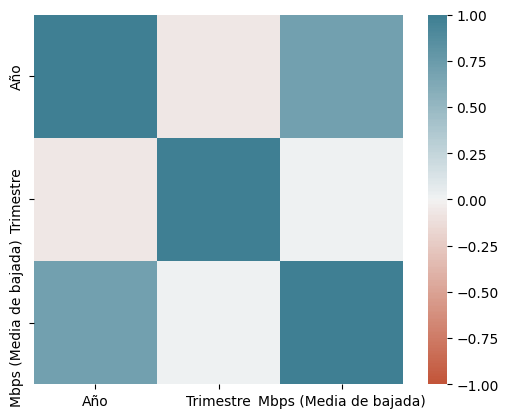

In [278]:
corr_matrix = df_I_vel_down.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

### Conclusion:

###### Con estas visualizaciones básicas que se realizamos con los datos nos sirvieron para descubrir patrones y anomalías (valores atípicos, nulls, valores faltantes, tipo de valores que tenemos y cuales debemos cambiar) y asi poder formular nuestras hipótesis basadas en nuestra comprensión del conjunto de datos. La visualizacion es normal sin sesgos.

## Continuamos con las transformaciones

### Transformaciones de la tabla: Acceso a Internet, cada 100 hogares por provincia:
Solo hice el cambio de formato de object a float

In [279]:
df_P_100_prov.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [280]:
df_P_100_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [281]:
# elimina las comas de la columna 'Columna' y convierte a tipo float
df_P_100_prov['Accesos por cada 100 hogares'] = df_P_100_prov['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
df_P_100_prov['Accesos por cada 100 hab'] = df_P_100_prov['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)


In [282]:
df_P_100_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [283]:
# Combinamos las columnas de Año y Trimestre en una sola columna que contenga el año y trimestre en formato string
df_P_100_prov['Año_Trimestre'] = df_P_100_prov['Año'].astype(str) + '-Q' + df_P_100_prov['Trimestre'].astype(str)

# Convertimos la columna Año_Trimestre a formato de fecha
df_P_100_prov['Fecha'] = pd.to_datetime(df_P_100_prov['Año_Trimestre'])

In [284]:
df_P_100_prov = df_P_100_prov.drop('Periodo', axis=1)

In [285]:
df_P_100_prov.head()#checkeamos

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Año_Trimestre,Fecha
0,2022,3,76.64,23.95,2022-Q3,2022-07-01
1,2022,2,75.97,23.72,2022-Q2,2022-04-01
2,2022,1,73.88,23.05,2022-Q1,2022-01-01
3,2021,4,73.18,22.81,2021-Q4,2021-10-01
4,2021,3,70.58,21.98,2021-Q3,2021-07-01


### Transformaciones de la tabla: internet por velocidad y provincia:
Lo que hago acá es convertir los datos de mb en enteros, ya que estaban en float o string y agrego la columna 'periodo' indicando el periodo del trimestre y el año

In [286]:
df_I_vel_prov.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [287]:
from datetime import datetime

In [288]:
df_I_vel_prov.info()#Checkeo los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [289]:
#Transformaciones que puedo realizar directamente
df_I_vel_prov['+ 30 Mbps'] = df_I_vel_prov['+ 30 Mbps'].str.replace(r'\.', '').astype('int64')
df_I_vel_prov['Total'] = df_I_vel_prov['Total'].str.replace(r'\.', '').astype('int64')
df_I_vel_prov['+ 1 Mbps - 6 Mbps'] = df_I_vel_prov['+ 1 Mbps - 6 Mbps'].str.replace(r'\.', '').astype('int64')

<ipython-input-289-ee20c991f6ee>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['+ 30 Mbps'] = df_I_vel_prov['+ 30 Mbps'].str.replace(r'\.', '').astype('int64')
<ipython-input-289-ee20c991f6ee>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['Total'] = df_I_vel_prov['Total'].str.replace(r'\.', '').astype('int64')
<ipython-input-289-ee20c991f6ee>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['+ 1 Mbps - 6 Mbps'] = df_I_vel_prov['+ 1 Mbps - 6 Mbps'].str.replace(r'\.', '').astype('int64')


In [290]:
#convierto en string los floats para hacer lo mismo que en el primer paso
df_I_vel_prov['HASTA 512 kbps'] = df_I_vel_prov['HASTA 512 kbps'].astype('str')
df_I_vel_prov['+ 512 Kbps - 1 Mbps'] = df_I_vel_prov['+ 512 Kbps - 1 Mbps'].astype('str')
df_I_vel_prov['+ 6 Mbps - 10 Mbps'] = df_I_vel_prov['+ 6 Mbps - 10 Mbps'].astype('str')
df_I_vel_prov['+ 10 Mbps - 20 Mbps'] = df_I_vel_prov['+ 10 Mbps - 20 Mbps'].astype('str')
df_I_vel_prov['+ 20 Mbps - 30 Mbps'] = df_I_vel_prov['+ 20 Mbps - 30 Mbps'].astype('str')
df_I_vel_prov['OTROS'] = df_I_vel_prov['OTROS'].astype('str')


In [291]:
#Transformaciones de string a int 
df_I_vel_prov['HASTA 512 kbps'] = df_I_vel_prov['HASTA 512 kbps'].str.replace(r'\.', '').astype('int64')
df_I_vel_prov['+ 512 Kbps - 1 Mbps'] = df_I_vel_prov['+ 512 Kbps - 1 Mbps'].str.replace(r'\.', '').astype('int64')
df_I_vel_prov['+ 6 Mbps - 10 Mbps'] = df_I_vel_prov['+ 6 Mbps - 10 Mbps'].str.replace(r'\.', '').astype('int64')
df_I_vel_prov['+ 10 Mbps - 20 Mbps'] = df_I_vel_prov['+ 10 Mbps - 20 Mbps'].str.replace(r'\.', '').astype('int64')
df_I_vel_prov['+ 20 Mbps - 30 Mbps'] = df_I_vel_prov['+ 20 Mbps - 30 Mbps'].str.replace(r'\.', '').astype('int64')

<ipython-input-291-37e79497f369>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['HASTA 512 kbps'] = df_I_vel_prov['HASTA 512 kbps'].str.replace(r'\.', '').astype('int64')
<ipython-input-291-37e79497f369>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['+ 512 Kbps - 1 Mbps'] = df_I_vel_prov['+ 512 Kbps - 1 Mbps'].str.replace(r'\.', '').astype('int64')
<ipython-input-291-37e79497f369>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['+ 6 Mbps - 10 Mbps'] = df_I_vel_prov['+ 6 Mbps - 10 Mbps'].str.replace(r'\.', '').astype('int64')
<ipython-input-291-37e79497f369>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['+ 10 Mbps - 20 Mbps'] = df_I_vel_prov['+ 10 Mbps - 20 Mbps'].str.replace(r'\.', '').astype('int64')
<ipython-input-291-37e79

In [292]:
# Elimino el string 'nan' de la columna 'OTROS' porque me tiraba error por éste valor
df_I_vel_prov = df_I_vel_prov.drop(df_I_vel_prov[df_I_vel_prov['OTROS'] == 'nan'].index)
df_I_vel_prov.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

In [293]:
#Realizo la transformacion
df_I_vel_prov['OTROS'] = df_I_vel_prov['OTROS'].replace(r'\.', '').str.replace(r'\.', '').astype('int64')

<ipython-input-293-bdd029a8adb1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_vel_prov['OTROS'] = df_I_vel_prov['OTROS'].replace(r'\.', '').str.replace(r'\.', '').astype('int64')


In [294]:
# Combinamos las columnas de Año y Trimestre en una sola columna que contenga el año y trimestre en formato string
df_I_vel_prov['Año_Trimestre'] = df_I_vel_prov['Año'].astype(str) + '-Q' + df_I_vel_prov['Trimestre'].astype(str)

# Convertimos la columna Año_Trimestre a formato de fecha
df_I_vel_prov['Fecha'] = pd.to_datetime(df_I_vel_prov['Año_Trimestre'])

In [295]:
df_I_vel_prov.head()#Checkeamos transformaciones

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Año_Trimestre,Fecha
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821,4721668,2022-Q3,2022-07-01
1,2022,3,Capital Federal,5170,5742,34371,67829,51946,28692,1253105,105477,1547679,2022-Q3,2022-07-01
2,2022,3,Catamarca,710,3840,3107,5389,5099,3737,50298,2208,70293,2022-Q3,2022-07-01
3,2022,3,Chaco,4610,9870,16782,18938,8049,15828,79390,3711,144146,2022-Q3,2022-07-01
4,2022,3,Chubut,1090,1444,45707,3094,34682,15309,17563,20024,165778,2022-Q3,2022-07-01


### Transformaciones de la tabla: internet por tecnología y provincia:
Lo que hago acá es convertir los datos de las tecnologías en enteros, ya que estaban en float o string y agrego la columna 'periodo' indicando el periodo del trimestre y el año

In [296]:
df_I_tec_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [297]:
df_I_tec_prov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           840 non-null    object 
 1   Trimestre     840 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 65.6+ KB


In [298]:
df_I_tec_prov['Año'] = df_I_tec_prov['Año'].replace('[^0-9]+', '', regex=True)
df_I_tec_prov['Trimestre'] = df_I_tec_prov['Trimestre'].replace('[^0-9]+', '', regex=True)

In [299]:
df_I_tec_prov['Año']=df_I_tec_prov['Año'].astype('int64')
df_I_tec_prov['Trimestre']=df_I_tec_prov['Trimestre'].astype('int64')

In [300]:
df_I_tec_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [301]:
#Transformaciones que puedo realizar directamente
df_I_tec_prov['ADSL'] = df_I_tec_prov['ADSL'].str.replace(r'\.', '').astype('int64')
df_I_tec_prov['Cablemodem'] = df_I_tec_prov['Cablemodem'].str.replace(r'\.', '').astype('int64')
df_I_tec_prov['Fibra óptica'] = df_I_tec_prov['Fibra óptica'].str.replace(r'\.', '').astype('int64')
df_I_tec_prov['Total'] = df_I_tec_prov['Total'].str.replace(r'\.', '').astype('int64')

<ipython-input-301-26f8c6679a17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_tec_prov['ADSL'] = df_I_tec_prov['ADSL'].str.replace(r'\.', '').astype('int64')
<ipython-input-301-26f8c6679a17>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_tec_prov['Cablemodem'] = df_I_tec_prov['Cablemodem'].str.replace(r'\.', '').astype('int64')
<ipython-input-301-26f8c6679a17>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_tec_prov['Fibra óptica'] = df_I_tec_prov['Fibra óptica'].str.replace(r'\.', '').astype('int64')
<ipython-input-301-26f8c6679a17>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_tec_prov['Total'] = df_I_tec_prov['Total'].str.replace(r'\.', '').astype('int64')


In [302]:
#convierto en string los floats para hacer lo mismo que en el primer paso
df_I_tec_prov['Wireless'] = df_I_tec_prov['Wireless'].astype('str')
df_I_tec_prov['Otros'] = df_I_tec_prov['Otros'].astype('str')

In [303]:
#Transformaciones de string a int 
df_I_tec_prov['Wireless'] = df_I_tec_prov['Wireless'].str.replace(r'\.', '').astype('int64')
df_I_tec_prov['Otros'] = df_I_tec_prov['Otros'].str.replace(r'\.', '').astype('int64')

<ipython-input-303-03f067ffb635>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_tec_prov['Wireless'] = df_I_tec_prov['Wireless'].str.replace(r'\.', '').astype('int64')
<ipython-input-303-03f067ffb635>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_I_tec_prov['Otros'] = df_I_tec_prov['Otros'].str.replace(r'\.', '').astype('int64')


In [304]:
# Combinamos las columnas de Año y Trimestre en una sola columna que contenga el año y trimestre en formato string
df_I_tec_prov['Año_Trimestre'] = df_I_tec_prov['Año'].astype(str) + '-Q' + df_I_tec_prov['Trimestre'].astype(str)

# Convertimos la columna Año_Trimestre a formato de fecha
df_I_tec_prov['Fecha'] = pd.to_datetime(df_I_tec_prov['Año_Trimestre'])

In [310]:
df_I_tec_prov.head()#checkeamos 

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Año_Trimestre,Fecha
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,2022-Q3,2022-07-01
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,2022-Q3,2022-07-01
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293,2022-Q3,2022-07-01
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146,2022-Q3,2022-07-01
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778,2022-Q3,2022-07-01


### Transformaciones de la tabla: Velocidad media de bajada por provincia:
Solo agregué la columna de Fecha y Año_Trimestre

In [306]:
df_I_vel_down.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16


In [308]:
# Combinamos las columnas de Año y Trimestre en una sola columna que contenga el año y trimestre en formato string
df_I_vel_down['Año_Trimestre'] = df_I_vel_down['Año'].astype(str) + '-Q' + df_I_vel_down['Trimestre'].astype(str)

# Convertimos la columna Año_Trimestre a formato de fecha
df_I_vel_down['Fecha'] = pd.to_datetime(df_I_vel_down['Año_Trimestre'])

In [309]:
df_I_vel_down.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Año_Trimestre,Fecha
0,2022,3,Buenos Aires,70,2022-Q3,2022-07-01
1,2022,3,Capital Federal,101,2022-Q3,2022-07-01
2,2022,3,Catamarca,61,2022-Q3,2022-07-01
3,2022,3,Chaco,53,2022-Q3,2022-07-01
4,2022,3,Chubut,16,2022-Q3,2022-07-01


## Exportamos en csv:

In [311]:
df_P_100_prov.to_csv('/content/drive/MyDrive/csv_pwrBI/P_100_prov.csv')
df_I_vel_prov.to_csv('/content/drive/MyDrive/csv_pwrBI/I_vel_prov.csv')
df_I_tec_prov.to_csv('/content/drive/MyDrive/csv_pwrBI/I_tec_prov.csv')
df_I_vel_down.to_csv('/content/drive/MyDrive/csv_pwrBI/I_vel_bajada_prov.csv')